In [ ]:
import os
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Compose, Resize, ToPILImage
from PIL import Image
import numpy as np

def convert_to_tensor_dataset(root_dir, output_path, img_size=(32, 32)):
    transform = Compose([Resize(img_size), ToTensor()])

    dataset = ImageFolder(root=root_dir, transform=transform)
    data = []
    labels = []

    for img, label in dataset:
        data.append(img.numpy())
        labels.append(label)

    data = torch.tensor(np.stack(data))
    labels = torch.tensor(labels)
    torch.save({'data': data, 'labels': labels}, output_path)
    print(f"Datasets saved at {output_path}, including {len(data)} images.")

class CIFAR10WDataset(torch.utils.data.Dataset):
    def __init__(self, data_path, transform=None):
        super().__init__()
        dataset = torch.load(data_path)
        self.data = dataset['data']
        self.labels = dataset['labels']
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img, label = self.data[idx], self.labels[idx]
        img = ToPILImage()(img)
        if self.transform:
            img = self.transform(img)
        return img, label

In [ ]:
root_dir = "datasets/cifar10_w/data_360_cartoon_original/360-CT-01"
output_path = "datasets/cifar10_w/data_360_cartoon_original/360_CT_01.pt"
convert_to_tensor_dataset(root_dir, output_path)

In [22]:
test_transform = Compose([Resize((32, 32)), ToTensor()])
dataset = CIFAR10WDataset(output_path, test_transform)

/tmp/ipykernel_3302809/2415656682.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load(data_path)


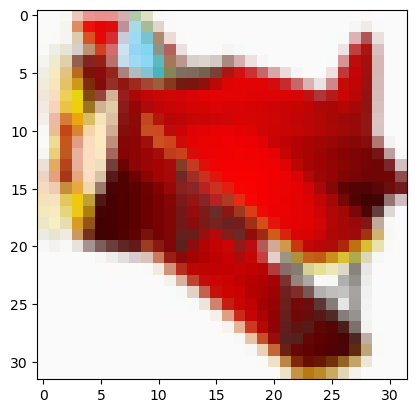

In [24]:
import matplotlib.pyplot as plt

plt.imshow(dataset[0][0].permute(1, 2, 0))